Entrez le ticker de l'ETF (ex : VOO pour l'ETF S&P 500) :  VOO


Analyse de l'ETF : VOO


[*********************100%***********************]  1 of 1 completed

1. Rendement annuel moyen : 15.81%
   - Très bon rendement annuel, supérieur à 10%. Cela montre une bonne performance.
2. Volatilité annuelle (risque) : 21.26%
   - Faible volatilité : L'ETF est stable et peu risqué.
3. Ratio de Sharpe : 0.74
   - Ratio acceptable : Rendement correct par rapport au risque.
4. RSI actuel : 48.14
   - RSI neutre : Pas de signal clair de surachat ou de survente.


<Figure size 1200x600 with 0 Axes>

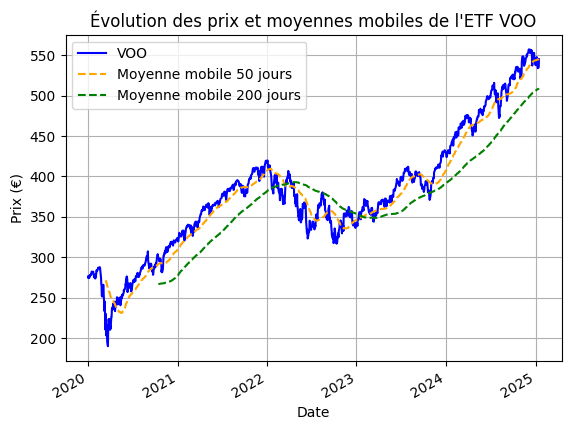

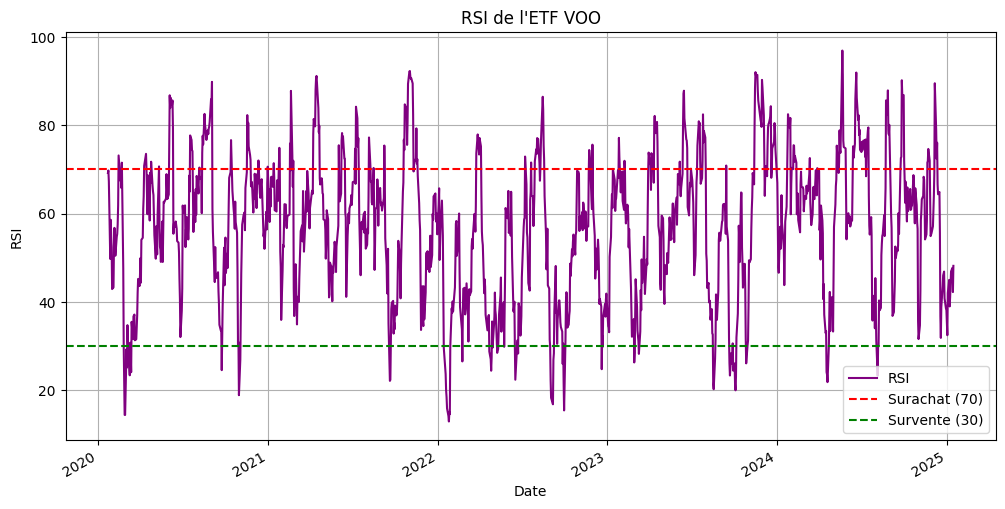


Rapport final et décision :
3. Décision : NE PAS INVESTIR. Le risque est trop élevé ou les performances sont insuffisantes.
4. Recommandation : Diversifiez vos investissements et surveillez les signaux RSI pour des opportunités.


In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Fonction pour calculer le RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    """Calcule le RSI à partir des prix de clôture."""
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def analyser_etf(ticker):
    """
    Analyse un ETF avec son ticker et affiche des informations importantes pour investir.
    Ajoute des conseils basés sur les métriques calculées et un rapport interprété.
    """
    print(f"Analyse de l'ETF : {ticker}")
    print("=" * 40)

    # Déterminer la date actuelle
    aujourd_hui = datetime.today().strftime('%Y-%m-%d')

    # Télécharger les données de l'ETF
    try:
        data = yf.download(ticker, start="2020-01-01", end=aujourd_hui)
    except Exception as e:
        print(f"Erreur lors du téléchargement des données : {e}")
        return

    if data.empty:
        print("Erreur : Impossible de télécharger les données pour cet ETF. Vérifiez le ticker.")
        return

    # Calculer les rendements quotidiens
    data['Daily Return'] = data['Close'].pct_change()

    # Calculer les métriques importantes
    annual_return = data['Daily Return'].mean() * 252  # Rendement annuel moyen (252 jours boursiers)
    annual_volatility = data['Daily Return'].std() * (252 ** 0.5)  # Volatilité annuelle
    sharpe_ratio = annual_return / annual_volatility if annual_volatility != 0 else 0

    # Ajouter des moyennes mobiles et RSI
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()
    data['RSI'] = calculate_rsi(data['Close'])

    # Afficher les résultats avec interprétation
    print(f"1. Rendement annuel moyen : {annual_return:.2%}")
    if annual_return > 0.10:
        print("   - Très bon rendement annuel, supérieur à 10%. Cela montre une bonne performance.")
    elif annual_return > 0.05:
        print("   - Rendement acceptable, mais surveillez les autres métriques.")
    else:
        print("   - Rendement faible, cela pourrait indiquer une performance limitée.")

    print(f"2. Volatilité annuelle (risque) : {annual_volatility:.2%}")
    if annual_volatility < 15:
        print("   - Faible volatilité : L'ETF est stable et peu risqué.")
    elif annual_volatility <= 20:
        print("   - Volatilité modérée : Risque moyen, surveillez les tendances.")
    else:
        print("   - Volatilité élevée : L'ETF est risqué avec des fluctuations importantes.")

    print(f"3. Ratio de Sharpe : {sharpe_ratio:.2f}")
    if sharpe_ratio > 1.0:
        print("   - Excellent ratio : Le rendement justifie largement le risque.")
    elif sharpe_ratio >= 0.5:
        print("   - Ratio acceptable : Rendement correct par rapport au risque.")
    else:
        print("   - Ratio faible : Le risque n'est pas compensé par le rendement.")

    print(f"4. RSI actuel : {data['RSI'].iloc[-1]:.2f}")
    if data['RSI'].iloc[-1] > 70:
        print("   - Attention : Niveau de surachat, une correction pourrait survenir.")
    elif data['RSI'].iloc[-1] < 30:
        print("   - Opportunité : Niveau de survente, potentiel d'achat intéressant.")
    else:
        print("   - RSI neutre : Pas de signal clair de surachat ou de survente.")

    # Graphiques
    plt.figure(figsize=(12, 6))
    data['Close'].plot(label='Prix de clôture', color='blue')
    data['SMA_50'].plot(label='Moyenne mobile 50 jours', linestyle='--', color='orange')
    data['SMA_200'].plot(label='Moyenne mobile 200 jours', linestyle='--', color='green')
    plt.title(f"Évolution des prix et moyennes mobiles de l'ETF {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Prix (€)")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    data['RSI'].plot(title=f"RSI de l'ETF {ticker}", color='purple')
    plt.axhline(70, linestyle='--', color='red', label='Surachat (70)')
    plt.axhline(30, linestyle='--', color='green', label='Survente (30)')
    plt.xlabel("Date")
    plt.ylabel("RSI")
    plt.legend()
    plt.grid()
    plt.show()

    # Rapport final et décision
    print("\nRapport final et décision :")
    if sharpe_ratio > 1.0 and annual_return > 0.10 and annual_volatility < 20:
        print("1. Décision : INVESTIR. Cet ETF présente un excellent équilibre entre rendement et risque.")
    elif 0.5 <= sharpe_ratio <= 1.0 and 0.05 < annual_return <= 0.10 and annual_volatility <= 20:
        print("2. Décision : ATTENDRE. Cet ETF est correct, mais des signaux plus clairs sont nécessaires.")
    else:
        print("3. Décision : NE PAS INVESTIR. Le risque est trop élevé ou les performances sont insuffisantes.")

    print("4. Recommandation : Diversifiez vos investissements et surveillez les signaux RSI pour des opportunités.")

# Exemple d'utilisation
etf_ticker = input("Entrez le ticker de l'ETF (ex : VOO pour l'ETF S&P 500) : ").strip().upper()
analyser_etf(etf_ticker)
